# A Gentle Introduction to Cross-Entropy for Machine Learning

__Cross-entropy is commonly used in machine learning as a loss function.__

Cross-entropy is a measure from the field of information theory, building upon entropy and generally __calculating the difference between two probability distributions__. 

It is closely related to but is __different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions__.

__Cross-entropy is different from KL divergence but can be calculated using KL divergence, and is different from log loss but calculates the same quantity when used as a loss function.__

## What is Information Theory?

Information theory is a field of study concerned with quantifying information for communication.

It is __a subfield of mathematics__ and is __concerned with topics like data compression and the limits of signal processing__. The field was proposed and developed by Claude Shannon while working at the US telephone company Bell Labs.

Information theory is concerned with representing data in a compact fashion (a task known as data compression or source coding), as well as with transmitting and storing it in a way that is robust to errors (a task known as error correction or channel coding).

__A foundational concept from information is the quantification of the amount of information in things like events, random variables, and distributions.__

Quantifying the amount of information requires the use of probabilities, hence the relationship of information theory to probability.

Measurements of information are widely used in artificial intelligence and machine learning, such as in the construction of decision trees and the optimization of classifier models.

## Calculate the Information for an Event

Information은 정보이론에서는 bit로 측정되며, 주어진 이벤트에서 발생하는 놀라움의 양 으로 이해할 수 있습니다. 엄청 불공평한 동전이 있다고 가정해봅시다. 앞면이 나올 확률이 99%, 뒷면이 나올 확률이 1%일때, 앞면이 나오는 일은 놀랍지 않습니다. 다만 뒷면이 나오면 굉장히 놀라겠죠. 특정한 stochastic event $x$에 대한  Information의 수학적 정의는 이벤트 x가 발생할 확률 negative log로 나타낼 수 있으며, 밑이 2인 로그를 사용합니다.

$$h(x) = -log(P(x))$$

The negative sign ensures that the result is always positive or zero.

아무튼, 다시 동전 던지기로 넘어가서 앞면에 대한 information은 -log2(0.99) = 0.0144bits 로 굉장히 낮으며, 반대로 뒷면에 대한 information은 -log2(0.01) = 6.64bits 로 높은 값을 갖습니다. 즉, 놀라움의 정도가 information에 잘 반영되어 있죠.

* 확률이 낮은 사건 (surprising): More information.
* 확률이 높은 사건 (unsurprising): Less information.

The choice of the base-2 logarithm means that the units of the information measure is in bits (binary digits). This can be 
directly interpreted in the information processing sense as the number of bits required to represent the event.

Other logarithms can be used instead of the base-2. For example, it is also common to use the natural logarithm that uses base $e$ (Euler’s number) in calculating the information, in which case the units are referred to as “nat(natural unit of information)s.” One nat is the information content of the uniform distribution on the interval [0, $e$].

## What is Entropy?

Entropy는 특정한 stochastic process에서 생성된 information의 평균 즉, Information의 기대 값으로 정의됩니다.

For a random variable $X$ with probability distribution $P$, this might be written as a function $H(X).

Entropy $H(x)$ can be calculated for a random variable with a set of $x$ in $X$ discrete states discrete states and their probability $P(x)$ as follows:

$$\tag {1} H(X) = E[h(x)] = E[-log(P(X)] = -\sum_{x \in X} P(x)\cdot log(P(x))$$

__Entropy__ is the average or expected number of bits required to transmit a randomly selected event from a probability distribution. 

앞서 예를 든 앞면이 나올 확률이 99%, 뒷면이 나올 확률이 1%인 동전의 경우 

$$H(X) = - \big(0.99 log(0.99) + 0.01 log(0.01)\big) = 0.08 bits$$

반면에 공정한 동전의 경우 

$$H(X) = - \big(0.5 log(0.5) + 0.5 log(0.5)\big) = 1 bits$$

__A skewed distribution (불공평한 동전 또는 주사위) has a low entropy, whereas a distribution where events have equal probability (fair coin or dice) has a larger entropy.__

A skewed probability distribution has less “surprise” and in turn a low entropy because likely events dominate. Balanced distribution are more surprising and in turn have higher entropy because events are equally likely.

* Skewed Probability Distribution (unsurprising): Low entropy.
* Balanced Probability Distribution (surprising): High entropy.

The lowest entropy is calculated for a random variable that has a single event with a probability of 1.0, a certainty. The largest entropy for a random variable will be if all events are equally likely.

Calculating the entropy for a random variable provides the basis for other measures such as mutual information (information gain).

Entropy also provides the basis for calculating the difference between two probability distributions with cross-entropy and the KL-divergence.

## Entropy and Machine Learning

위의 설명을 통해 Entropy의 정의를 알게 되었습니다. 이제 Entropy가 머신러닝에서 어떻게 사용되는지 알아볼 차례입니다. 

머신러닝을 다뤄봤다면 Cross-Entropy는 한 번쯤은 들어봤을 것입니다. 이건 밑에서 더 자세히 다룰 예정이고, 그냥 Entropy도 머신러닝에서 자주 사용됩니다. 

강화학습의 policy gradient optimization을 예로 들면, Neural Network는 agent를 control하도록 학습되고, NN의 output은 softmax layer로 구성되어 있습니다. 이 softmax output layer는 agent가 취할 수 있는 best action의 확률 분포 형태를 띄는데, 만약 action size 4를 갖는 environment가 있으면 output은 주어진 game state에 대해 다음과 같이 나타날 수 있습니다. (예시입니다)

{0.9, 0.05, 0.025, 0.025}

위와 같은 경우 agent는 아마도 첫번째 action을 선택할 것입니다. 하지만, 강화학습에서 고려되어야 하는 요소에 “agent가 특정한 하나의 action 혹은 strategy에 너무 빠르게 수렴하면 안된다!”는 조건이 있습니다. 이를 encouraging exploration이라 부릅니다. Policy gradient에서는 exploration은 output layer의 entropy의 negative를 loss function에 녹여 냄으로써 위의 조건이 만족됩니다.

위의 예시로 든 output에서 첫번째 action(p=0.9)을 선택을 고려한 entropy는 매우 낮습니다.

(0.9 x log2(0.9) + 0.05 x log2(0.05) + 0.025 x log2(0.025) + 0.025 x log2(0.025)) = 0.61bits

만약 softmax layer의 output이 {0.3, 0.2, 0.25, 0.25} 형태였으면 entropy는 1.98bits로 거의 3배가 됩니다. 즉, agent가 어떤 action을 취해야 할지에 대한 불확실성이 더 커진 셈이며, 불확실성이 entropy에 반영됩니다. Negative entropy가 loss function에 반영이 되어 있다면, 높은 entropy 값은 낮은 entropy 값보다 loss를 더 크게 줄일 것이며, 그 덕에 특정 action에 너무 빠르게 수렴하는 것을 방지해줄 것입니다.

## What is Cross-Entropy?

- **Cross entropy**는 두 확률 분포 P, Q 사이의 차이를 측정하는 지표 

위에서 다룬 entropy는 하나의 확률 분포에 대한 측정 지표였다면, Cross entropy는 두 확률 분포에 대한 측정 지표인 셈이죠. 머신러닝에서 주로 사용되는 neural network에 대해 생각해보면, supervised learning 셋팅에서 GT가 존재하기 때문에 true probability distribution P가 존재하고, neural network가 학습을 통해 approximate probability distribution Q를 배우게 됩니다. 이 때, P와 Q 사이의 거리 혹은 차이를 최소화할 필요가 있습니다. 

Cross-Entropy는 아래와 같이 정의됩니다.

$$  H(p,q) = H(p) + D_{KL}\left(p||q\right) = -\sum_{i=0}^{n} p(x_i)log\left(q\left(x_i\right)\right)$$ 

RHS의 첫번째 항은 앞에서 이미 살펴본 true probability distribution의  엔트로피이며 이는 DL학습과정에서 고정되어 있고 최적화 과정에서 approximation probability distribution q가 바뀌며 이에 따라 두번째 term이 바뀝니다. 이 두번째 term에서 분포 P와 Q의 정보량의 차이가 정의됩니다. 즉, 두 확률 분포의 차이를 나타내는 지표인 cross entropy의 핵심은 두번째 term인 KL divergence입니다. 
 

<img src="https://hoya012.github.io/assets/img/ce_kldiv/10.png">


- Information: 주어진 임의의 이벤트에서 발생하는 놀라움의 양
- Entropy: 주어진 임의의 이벤트에서 발생한 Information들의 기대값
- KL divergence: 두 확률 분포 P, Q가 있을 때, P 분포를 - 근사하는 Q 분포를 통해 샘플링할 때 발생하는 정보량의 손실
- Cross entropy: 두 확률 분포 P, Q 사이의 차이를 측정하는 지표


📒 참고 문헌

1. [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

2. [An introduction to entropy, cross entropy and KL divergence in machine learning](https://hoya012.github.io/blog/cross_entropy_vs_kl_divergence/)

In [2]:
# Consider a flip of a single fair coin. The probability of heads (and tails) is 0.5. 
# We can calculate the information for flipping a head in Python using the log2() function.

# calculate the information for a coin flip
from math import log2
# probability of the event
p = 0.5
# calculate information for event
h = -log2(p)
# print the result
print('p(x)=%.3f, information: %.3f bits' % (p, h))

In [3]:
# # If the same fair coin was flipped n times, then the information for this sequence of flips would be n bits.
# If the coin was not fair and the probability of a head was instead 10% (0.1), then the event would be more rare and 
# would require more than 3 bits of information.

p = 0.1 # probability of head
h = -log2(p)
print('p(x)=%.3f, information: %.3f bits' % (p, h))

In [4]:
# We know the probability of rolling any number is 1/6, which is a smaller number than 1/2 for a coin flip, therefore we would expect more surprise or a larger amount of 
# information.

p = 1.0 / 6.0
h = -log2(p)
print('p(x)=%.3f, information: %.3f bits' % (p, h))

p(x)=0.167, information: 2.585 bits


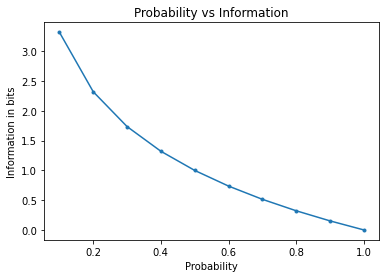

In [5]:
#  We can further develop the intuition that low probability events have more information.
# To make this clear, we can calculate the information for probabilities between 0 and 1 and plot the corresponding 
# information for each. We can then create a plot of probability vs information. 
# We would expect the plot to curve downward from low probabilities with high information to high probabilities with 
# low information.

from math import log2
from matplotlib import pyplot
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
pyplot.plot(probs, info, marker='.')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information in bits')
pyplot.show()

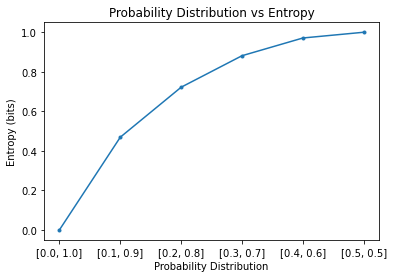

In [6]:
# We can explore this for a simple distribution with two events, like a coin flip, but explore different probabilities for 
# these two events and calculate the entropy for each.
# In the case where one event dominates, such as a skewed probability distribution, then there is less surprise and the 
# distribution will have a lower entropy. In the case where no event dominates another, such as equal or approximately equal 
# probability distribution, then we would expect larger or maximum entropy.

# compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot
 
# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])
 
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

## Cross-Entropy and KL divergence

Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

Cross entropy는 두 확률 분포 P, Q 사이의 차이를 측정하는 지표입니다. 위에서 다룬 entropy는 하나의 확률 분포에 대한 측정 지표였다면, Cross entropy는 두 확률 분포에 대한 측정 지표인 셈이죠. 

머신러닝에서 주로 사용되는 neural network에 대해 생각해보면, supervised learning 셋팅에서 GT가 존재하기 때문에 true probability distribution P가 존재하고, neural network가 학습을 통해 approximate probability distribution Q를 배우게 됩니다. 이 때, P와 Q 사이의 거리 혹은 차이를 최소화할 필요가 있습니다.

Cross entropy 함수는 아래와 같이 정의됩니다.

Cross-entropy can be calculated using the probabilities of the events from P and Q, as follows:

$$\tag{2} H(P, Q) = –\sum_{x \in X} P(x) \cdot log(Q(x))$$

where $P(x)$ is the probability of the event $x$ in $P$, $Q(x)$ is the probability of event $x$ in $Q$ and $log$ is the base-2 logarithm, meaning that the results are in bits. 


### KL divergence

__Cross-entropy is not KL Divergence.__

Cross-entropy is related to divergence measures, such as the Kullback-Leibler, or KL, Divergence that quantifies how much one distribution differs from another.

두 확률 분포 간의 KL divergence는 정보 이론적인 관점에서 보면 굉장히 다양한 해석이 가능하며, “놀라움”의 표현이기도 합니다. 두 확률 분포 P, Q가 가까웠다는 가정 하에, 만약 P와 Q가 가깝지 않다면 놀라운 일이며, 이 때 KL divergence는 높은 값을 갖게 되며, 반대로 가정대로 P와 Q가 가깝다면, 이는 놀랍지 않은 일이며 KL divergence도 낮은 값을 갖게 됩니다.

Bayesian 관점에서 보면 KL divergence는 prior distribution Q에서 posterior distribution P로 이동할 때 얻어지는 information을 의미합니다. KL divergence의 표현은 likelihood ratio approach를 통해 나타낼 수 있습니다. likelihood ratio는 아래와 같이 쉽게 표현이 가능합니다.

$$LR = \Big(\frac{P(x)}{Q(x)}\Big)$$

만약 어떠한 값 x가 임의의 분포로부터 sampling 되었을 때, likelihood ratio는 sample이 분포 q보다 분포 p에서 나왔을 확률을 의미합니다. p에서 나왔을 가능성이 높은 경우 LR은 1보다 큰 값을 갖고, 반대의 경우 1보다 작은 값을 갖습니다. 독립적인 sample이 많이 있고, 이 모든 것들을 고려하여 likelihood function을 추정한다고 가정해봅시다. 그러면 아래와 같이 LR을 나타낼 수 있습니다.

$$LR = \prod_{x \in X}\Big(\frac{P(x)}{Q(x)}\Big)$$

양변에 log를 씌워주면 아래와 같은 식을 얻을 수 있습니다. log 내부에서는 곱셈이 합으로 바뀌게 되죠. 이를 log likelihood ratio라 부릅니다. 

$$\begin{split} log(LR) & = log\Big(\prod_{x \in X}\big(\frac{P(x)}{Q(x)}\big)\Big) \\
                        & = \sum_{x \in X} log \Big(\frac{P(x)}{Q(x)}\Big) \end{split}$$

이제 우리는 likelihood ratio를 모종의 합으로 표현할 수 있게 되었습니다. 이제 각 sample들이 평균적으로 q(x)보다 p(x)에서 나왔는지를 정량화 하는지에 대해 답해봅시다. 답하기 위해 우리는 likelihood ratio에 기대값을 취할 것입니다.

\\begin{split} E\big[log(LR)\big] & = E\Big[ \sum_{x \in X} log \big(\frac{P(x)}{Q(x)}\big)\Big]\\
                                   & = \sum_{x \in X} P(x)log \big(\frac{P(x)}{Q(x)}\big) \\
                                   & \equiv  D_{KL}(P||Q)
                                   \end{split}
                                   

이렇게 log likelihood ratio에 기대값을 취해준 값이 바로 KL divergence 입니다. 즉, 정리하면 KL divergence는 얼마나 sampled data가 Q 분포 대신 P 분포로부터 나왔는지를 나타내는 likelihood ratio의 기대값입니다! 정리가 잘 되셨나요?

The intuition for the KL divergence score is that __when the probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence. When the probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.__

Eq (1) 과 (2)를 이용하여 다음 결과를 얻게된다. 

\begin{split} H(P,Q) - H(P) & = –\sum_{x \in X} P(x) \cdot log(Q(x)) + \sum_{x \in X} P(x) \cdot log(P(x) \\
                             & = \sum_{x \in X} P(x)log \big(\frac{P(x)}{Q(x)}\big) \\
                             & = D_{KL}(P||Q) \end{split}

다르게 표현하면,

$$\tag{3} H(P,Q) = H(P) + D_{KL}(P||Q) $$

As such, __we can calculate the cross-entropy by adding the entropy of the distribution plus the additional entropy calculated by the KL divergence.__ 

첫번째 term은 true probability distribution P의 entropy를 의미하고, optimization 동안 고정되어 있고, optimization 과정에서 approximation probability distribution Q가 바뀌며 이에 따라 두번째 term이 바뀝니다. 이 두번째 term에서 분포 P와 분포 Q의 정보량의 차이가 정의됩니다. 즉, 두 확률 분포의 차이를 나타내는 지표인 cross entropy의 핵심은 두번째 term인 KL divergence입니다. 이제 KL divergence가 뭔 지 설명 드리겠습니다.

KL divergence의 가장 중요한 특징은 교환법칙이 성립하지 않는다는 점입니다.

$$D_{KL}(P||Q) \ne D_{KL}(Q||P)$$

즉, P와 Q의 KL divergence는 Q와 P의 KL divergence와 다른 값을 가집니다. 즉, KL divergence는 두 분포 간의 거리 개념이 아니며 distance metric도 아닙니다.

Like KL divergence, cross-entropy is not symmetrical, meaning that:

$$H(P, Q) \ne H(Q, P)$$

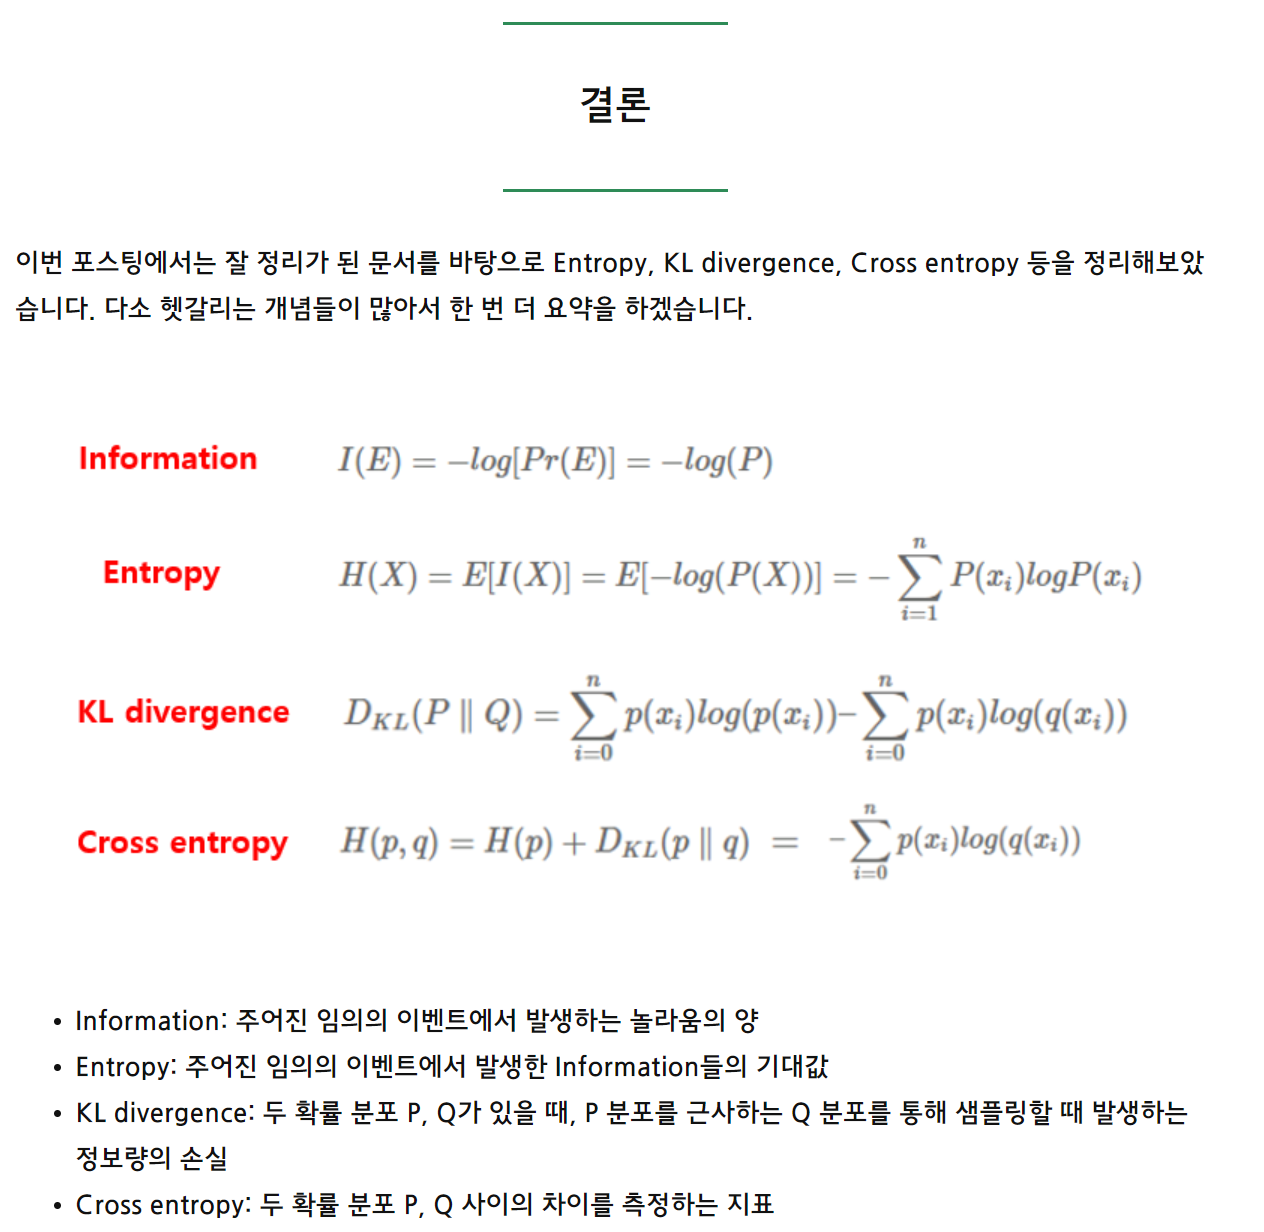

In [1]:
# Consider a random variable with three discrete events as different colors: red, green, and blue.

...
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

P=1.000 Q=1.000


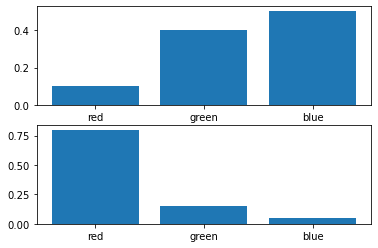

In [2]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)  # subplot(nrows, ncols, index, **kwargs)
pyplot.bar(events, p)  # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [11]:
from math import log2
# Calculate Cross-Entropy Between Distributions

def cross_entropy(p,q):
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [12]:
...
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


In [13]:
# Calculate Cross-Entropy Between a Distribution and Itself
# If two probability distributions are the same, then the cross-entropy between them will be the entropy of the distribution.

# example of calculating cross entropy for identical distributions
from math import log2
 
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, P)
ce_pp = cross_entropy(p, p)
print('H(P, P): %.3f bits' % ce_pp)
# calculate cross entropy H(Q, Q)
ce_qq = cross_entropy(q, q)
print('H(Q, Q): %.3f bits' % ce_qq)

H(P, P): 1.361 bits
H(Q, Q): 0.884 bits


In [14]:
# Calculate Cross-Entropy Using KL Divergence

# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate entropy H(P)
def entropy(p):
    return -sum([p[i] * log2(p[i]) for i in range(len(p))])
 
# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
    return entropy(p) + kl_divergence(p, q)
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate H(P)
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)
# calculate kl divergence KL(P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


## Cross-Entropy as a Loss Function

Cross-entropy is widely used as a loss function when optimizing classification models.

Two examples that you may encounter include the logistic regression algorithm (a linear classification algorithm), and artificial neural networks that can be used for classification tasks.

Using the cross-entropy error function instead of the sum-of-squares for a classification problem leads to faster training as well as improved generalization.

Classification tasks that have just two labels for the output variable are referred to as binary classification problems, whereas those problems with more than two labels are referred to as categorical or multi-class classification problems.

Each example has a known class label with a probability of 1.0, and a probability of 0.0 for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-entropy can then be used to calculate the difference between the two probability distributions.

As such, we can map the classification of one example onto the idea of a random variable with a probability distribution as follows:

Random Variable: The example for which we require a predicted class label.
Events: Each class label that could be predicted.

In classification tasks, we know the target probability distribution P for an input as the class label 0 or 1 interpreted as probabilities as “impossible” or “certain” respectively. These probabilities have no surprise at all, therefore they have no information content or zero entropy.

Our model seeks to approximate the target probability distribution Q.

In the language of classification, these are the actual and the predicted probabilities, or y and yhat.

Expected Probability (y): The known probability of each class label for an example in the dataset (P).
Predicted Probability (yhat): The probability of each class label an example predicted by the model (Q).

We can, therefore, estimate the cross-entropy for a single prediction using the cross-entropy calculation described above; for example.

$$H(P, Q) = –\sum_{x \in X} P(x) \cdot log(Q(x))$$

Where each x in X is a class label that could be assigned to the example, and P(x) will be 1 for the known label and 0 for all other labels.

The cross-entropy for a single example in a binary classification task can be stated by unrolling the sum operation as follows:

$$H(P, Q) = – (P(class0) * log(Q(class0)) + P(class1) * log(Q(class1)))$$

If there are just two class labels, the probability is modeled as the Bernoulli distribution for the positive class label. This means that the probability for class 1 is predicted by the model directly, and the probability for class 0 is given as one minus the predicted probability, for example:

* Predicted P(class0) = 1 – yhat
* Predicted P(class1) = yhat

When calculating cross-entropy for classification tasks, the base-e or natural logarithm is used. This means that the units are in nats, not bits.

We are often interested in minimizing the cross-entropy for the model across the entire training dataset. This is calculated by calculating the average cross-entropy across all training examples.

__Calculate Entropy for Class Labels__

Recall that when two distributions are identical, the cross-entropy between them is equal to the entropy for the probability distribution.

Class labels are encoded using the values 0 and 1 when preparing data for classification tasks.

For example, if a classification problem has three classes, and an example has a label for the first class, then the probability distribution will be [1, 0, 0]. If an example has a label for the second class, it will have a probability distribution for the two events as [0, 1, 0]. This is called a one hot encoding.

This probability distribution has no information as the outcome is certain. We know the class. Therefore the entropy for this variable is zero.

This is an important concept and we can demonstrate it with a worked example.

Pretend we have a classification problem with 3 classes, and we have one example that belongs to each class. We can represent each example as a discrete probability distribution with a 1.0 probability for the class to which the example belongs and a 0.0 probability for all other classes.

We can calculate the entropy of the probability distribution for each “variable” across the “events“.

In [15]:
# entropy of examples from a classification task with 3 classes
from math import log2
from numpy import asarray

# calculate entropy
def entropy(p):
    return -sum([p[i] * log2(p[i]) for i in range(len(p))])

# class 1
p = asarray([1,0,0]) + 1e-15 # Note that we had to add a very small value to the 0.0 values to avoid the log() from blowing up
print(entropy(p))
# class 2
p = asarray([0,1,0]) + 1e-15
print(entropy(p))
# class 3
p = asarray([0,0,1]) + 1e-15
print(entropy(p))

9.805612959471341e-14
9.805612959471341e-14
9.805612959471341e-14


As we saw above, the entropy of a known class label is always 0.0.

This means that the cross entropy of two distributions (real and predicted) that have the same probability distribution for a class label, will also always be 0.0.

### Calculate Cross-Entropy Between Class Labels and Probabilities

The use of cross-entropy for classification often gives different specific names based on the number of classes, mirroring the name of the classification task; for example:

* Binary Cross-Entropy: Cross-entropy as a loss function for a binary classification task.
* Categorical Cross-Entropy: Cross-entropy as a loss function for a multi-class classification task.

In [3]:
# calculate cross entropy for classification problem
from math import log
from numpy import mean

# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])

# # Consider a two-class classification task with the following 10 actual class labels (P) and predicted class labels (Q).
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)

# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats
Average Cross Entropy: 0.247 nats


### Calculate Cross-Entropy Using Keras

We can confirm the same calculation by using the binary_crossentropy() function from the Keras deep learning API to calculate the cross-entropy loss for our small dataset.

In [5]:
# calculate cross entropy with keras
from numpy import asarray
from tensorflow.keras import backend
from tensorflow.keras.losses import binary_crossentropy
# prepare classification data
p = asarray([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
q = asarray([0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3])
# convert to keras variables
y_true = backend.variable(p)
y_pred = backend.variable(q)
# calculate the average cross-entropy
mean_ce = backend.eval(binary_crossentropy(y_true, y_pred))
print('Average Cross Entropy: %.3f nats' % mean_ce)

Average Cross Entropy: 0.247 nats


## Intuition for Cross-Entropy on Predicted Probabilities

For example, given that an average cross-entropy loss of 0.0 is a perfect model, what do average cross-entropy values greater than zero mean exactly?

We can explore this question with a binary classification problem where the class labels as 0 and 1. This is a discrete probability distribution with two events and a certain probability for one event and an impossible probability for the other event.

We can then calculate the cross entropy for different “predicted” probability distributions transitioning from a perfect match of the target distribution to the exact opposite probability distribution.

We would expect that as the predicted probability distribution diverges further from the target distribution that the cross-entropy calculated will increase.

The example below implements this and plots the cross-entropy result for the predicted probability distribution compared to the target of [0, 1] for two events as we would see for the cross-entropy in a binary classification task.

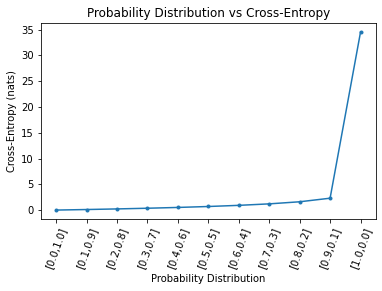

In [6]:
# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot

# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])

# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

We can see that as expected, cross-entropy starts at 0.0 (far left point) when the predicted probability distribution matches the target distribution, then steadily increases as the predicted probability distribution diverges.

We can also see a dramatic leap in cross-entropy when the predicted probability distribution is the exact opposite of the target distribution, that is, [1, 0] compared to the target of [0, 1].

We are not going to have a model that predicts the exact opposite probability distribution for all cases on a binary classification task.

As such, we can remove this case and re-calculate the plot.

The updated version of the code is listed below.

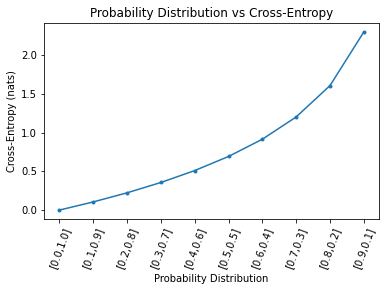

In [7]:
# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot

# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])

# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

Running the example gives a much better idea of the relationship between the divergence in probability distribution and the calculated cross-entropy.

We can see a super-linear relationship where the more the predicted probability distribution diverges from the target, the larger the increase in cross-entropy.

We can summarise these intuitions for the mean cross-entropy as follows:

* Cross-Entropy = 0.00: Perfect probabilities.
* Cross-Entropy < 0.02: Great probabilities.
* Cross-Entropy < 0.05: On the right track.
* Cross-Entropy < 0.20: Fine.
* Cross-Entropy > 0.30: Not great.
* Cross-Entropy > 1.00: Terrible.
* Cross-Entropy > 2.00 Something is broken.

This listing will provide a useful guide when interpreting a cross-entropy (log loss) from your logistic regression model, or your artificial neural network model.

### Log Loss and Cross Entropy Calculate the Same Thing

For classification problems, “log loss“, “cross-entropy” and “negative log-likelihood” are used interchangeably.
More generally, the terms “cross-entropy” and “negative log-likelihood” are used interchangeably in the context of 
loss functions for classification models.

Calculating log loss will give the same quantity as calculating the cross-entropy for Bernoulli probability distribution. 
We can confirm this by calculating the log loss using the log_loss() function from the scikit-learn API.

In [9]:
# calculate log loss for classification problem with scikit-learn
from sklearn.metrics import log_loss
from numpy import asarray
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# define data as expected, e.g. probability for each event {0, 1}
y_true = asarray([[1-v, v] for v in p])
y_pred = asarray([[1-v, v] for v in q])
# calculate the average log loss
ll = log_loss(y_true, y_pred)
print('Average Log Loss: %.3f' % ll)

Average Log Loss: 0.247


This does not mean that log loss calculates cross-entropy or cross-entropy calculates log loss.

Instead, they are different quantities, arrived at from different fields of study, that under the conditions of calculating a loss function for a classification task, result in an equivalent calculation and result. Specifically, a cross-entropy loss function is equivalent to a maximum likelihood function under a Bernoulli or Multinoulli probability distribution.

This demonstrates a connection between the study of maximum likelihood estimation and information theory for discrete probability distributions.

It is not limited to discrete probability distributions, and this fact is surprising to many practitioners that hear it for the first time.

Specifically, a linear regression optimized under the maximum likelihood estimation framework assumes a Gaussian continuous probability distribution for the target variable and involves minimizing the mean squared error function. This is equivalent to the cross-entropy for a random variable with a Gaussian probability distribution.

Any loss consisting of a negative log-likelihood is a cross-entropy between the empirical distribution defined by the training set and the probability distribution defined by model. For example, mean squared error is the cross-entropy between the empirical distribution and a Gaussian model.

This is a little mind blowing, and comes from the field of differential entropy for continuous random variables.

It means that if you calculate the mean squared error between two Gaussian random variables that cover the same events (have the same mean and standard deviation), then you are calculating the cross-entropy between the variables.

It also means that if you are using mean squared error loss to optimize your neural network model for a regression problem, you are in effect using a cross entropy loss.